In [127]:
import numpy as np
import os
import pandas as pd


In [128]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


In [129]:
from google.colab import files
uploaded = files.upload()

Saving dress.csv to dress (3).csv


In [130]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dress.csv']))

In [131]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [132]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [133]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [134]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# dress.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('dress.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'dress.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 4 columns


In [135]:
df1.head(5)

,_unit_id,category,category:confidence,image_url
0,851505458,ikat,0.3487,http://s3-eu-west-1.amazonaws.com/we-attribute...
1,851505459,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
2,851505460,polka dot,0.6709,http://s3-eu-west-1.amazonaws.com/we-attribute...
3,851505461,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
4,851505462,geometry,0.7035,http://s3-eu-west-1.amazonaws.com/we-attribute...


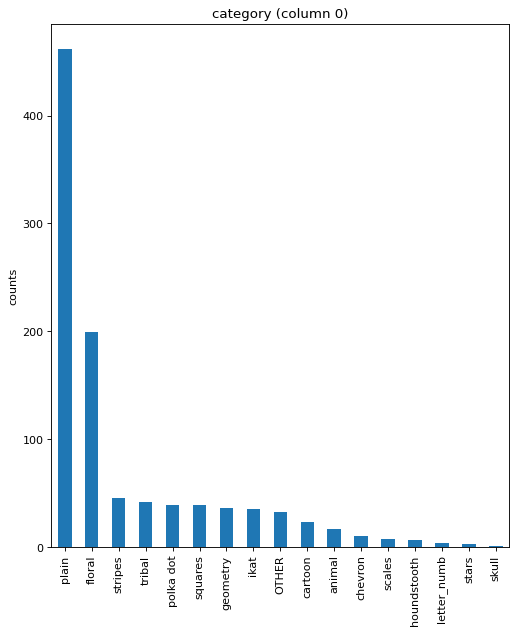

In [136]:
plotPerColumnDistribution(df1, 10, 5)

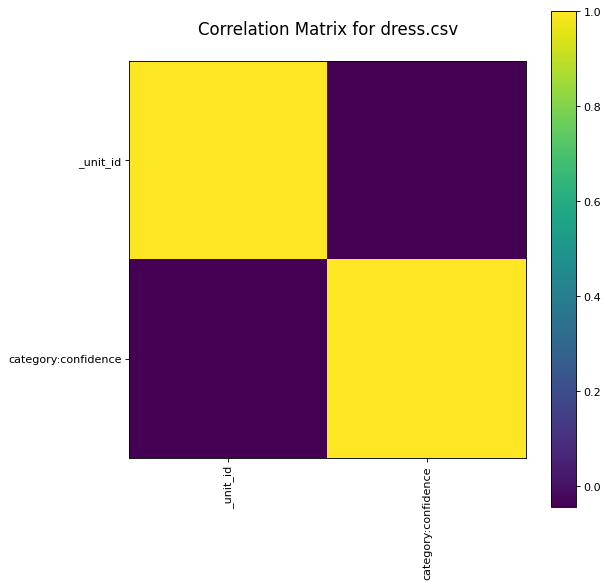

In [137]:
plotCorrelationMatrix(df1, 8)

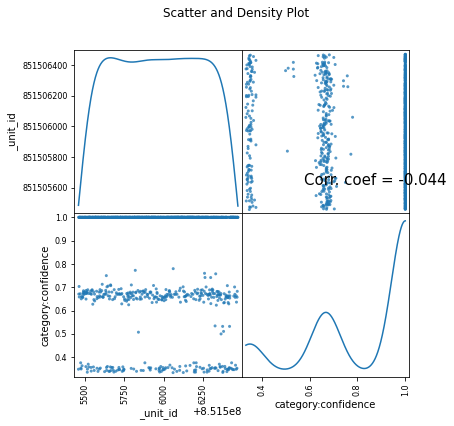

In [138]:
plotScatterMatrix(df1, 6, 15)

In [139]:
from matplotlib import pyplot as plt #for viewing images and plots
%matplotlib inline 
#So that Matplotlib plots don't open in separate windows outside the notebook

import urllib #For fetching data from Web URLs

import cv2   #For image processing

from sklearn.preprocessing import LabelEncoder    #For encoding categorical variables
from sklearn.model_selection import train_test_split #For splitting of dataset

#All tensorflow utilities for creating, training and working with a CNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [140]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [141]:
def show_image_from_url(image_url):
  response = urllib.request.urlopen(image_url)
  image = np.asarray(bytearray(response.read()), dtype="uint8")
  image_bgr = cv2.imdecode(image, cv2.IMREAD_COLOR)
  image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
  plt.imshow(image_rgb), plt.axis('off')

<Figure size 432x288 with 0 Axes>

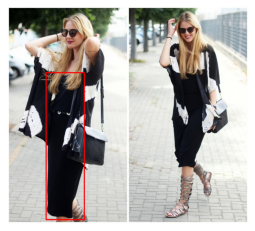

In [142]:
plt.figure()
show_image_from_url(df['image_url'].loc[9564])

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15702 entries, 0 to 15701
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _unit_id             15702 non-null  int64  
 1   category             15702 non-null  object 
 2   category:confidence  15702 non-null  float64
 3   image_url            15702 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 490.8+ KB


In [144]:
print('All categories : \n ', df['category'].unique())

All categories : 
  ['ikat' 'plain' 'polka dot' 'geometry' 'floral' 'squares' 'scales'
 'animal' 'OTHER' 'stripes' 'tribal' 'houndstooth' 'cartoon' 'chevron'
 'stars' 'letter_numb' 'skull']


In [145]:
n_classes = df['category'].nunique()
print('Total number of unique categories:', n_classes)

Total number of unique categories: 17


In [146]:
#Remove the category 'OTHER' from the dataset

df = df.loc[(df['category'] != 'OTHER')].reset_index(drop=True)

In [147]:
def image_processing(image_url):

  """
  Converts the URL of any image to an array of size 100x1 
  The array represents an OpenCV grayscale version of the original image
  The image will get cropped along the biggest red contour (4 line polygon) tagged on the original image (if any)
  """

  #Download from image url and import it as a numpy array
  response = urllib.request.urlopen(image_url)
  image = np.asarray(bytearray(response.read()), dtype="uint8")                         

  #Read the numpy arrays as color images in OpenCV
  image_bgr = cv2.imdecode(image, cv2.IMREAD_COLOR)

  #Convert to HSV for creating a mask
  image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

  #Convert to grayscale that will actually be used for training, instead of color image 
  image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

  #Create a mask that detects the red rectangular tags present in each image
  mask = cv2.inRange(image_hsv, (0,255,255), (0,255,255))

  #Get the coordinates of the red rectangle in the image, 
  #But take entire image if mask fails to detect the red rectangle
  if len(np.where(mask != 0)[0]) != 0:
    y1 = min(np.where(mask != 0)[0])
    y2 = max(np.where(mask != 0)[0])
  else:
    y1 = 0                                     
    y2 = len(mask)
  
  if len(np.where(mask != 0)[1]) != 0:
    x1 = min(np.where(mask != 0)[1])
    x2 = max(np.where(mask != 0)[1])
  else:
    x1 = 0
    x2 = len(mask[0])

  #Crop the grayscle image along those coordinates
  image_cropped = image_gray[y1:y2, x1:x2]

  #Resize the image to 100x100 pixels size
  image_100x100 = cv2.resize(image_cropped, (100, 100))

  #Save image as in form of array of 10000x1
  image_arr = image_100x100.flatten()
  return image_arr

In [148]:
'''
image_list = []

for url in df['image_url'] :
  image_list.append(image_processing(url))

X = np.array(image_list)

X = X/255

X = np.save('/content/X.npy', X)'''

"\nimage_list = []\n\nfor url in df['image_url'] :\n  image_list.append(image_processing(url))\n\nX = np.array(image_list)\n\nX = X/255\n\nX = np.save('/content/X.npy', X)"

In [149]:
import gdown

url = 'https://drive.google.com/uc?id=1B6_rtcmGRy49hqpwoJT-_Ujnt6cYj5Ba'
output = 'X.npy'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1B6_rtcmGRy49hqpwoJT-_Ujnt6cYj5Ba
To: /content/X.npy
1.22GB [00:13, 87.5MB/s]


'X.npy'

In [150]:
X = np.load('/content/X.npy')
X[0:3]
X.shape

array([[0.29803922, 0.29803922, 0.29803922, ..., 0.60392157, 0.6       ,
        0.29803922],
       [0.4627451 , 0.29803922, 0.29803922, ..., 0.29803922, 0.29803922,
        0.29803922],
       [0.30196078, 0.29803922, 0.29803922, ..., 0.29803922, 0.29803922,
        0.29803922]])

(15189, 10000)

<Figure size 432x288 with 0 Axes>

(<matplotlib.image.AxesImage at 0x7efc128c7080>, (-0.5, 99.5, 99.5, -0.5))

<Figure size 432x288 with 0 Axes>

(<matplotlib.image.AxesImage at 0x7efc128f3ba8>, (-0.5, 99.5, 99.5, -0.5))

<Figure size 432x288 with 0 Axes>

(<matplotlib.image.AxesImage at 0x7efc128b3630>, (-0.5, 99.5, 99.5, -0.5))

<Figure size 432x288 with 0 Axes>

(<matplotlib.image.AxesImage at 0x7efc128730b8>, (-0.5, 99.5, 99.5, -0.5))

<Figure size 432x288 with 0 Axes>

(<matplotlib.image.AxesImage at 0x7efc12820c18>, (-0.5, 99.5, 99.5, -0.5))

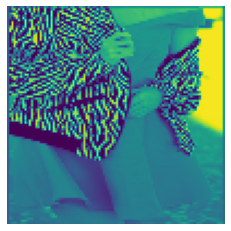

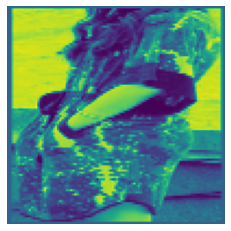

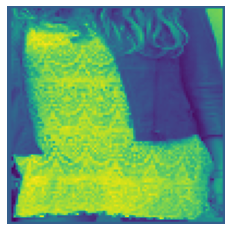

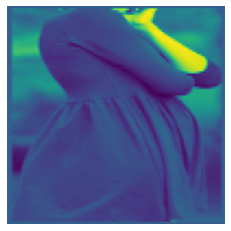

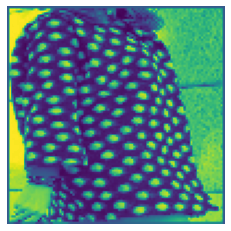

In [151]:

np.random.seed(17)
for i in np.random.randint(0, len(X), 5):
  plt.figure()
  plt.imshow(X[i].reshape(100, 100)), plt.axis('off')

In [152]:
#Fetch the categories column from the dataframe, and tranform into to numerical labels

encoder = LabelEncoder()
Targets = encoder.fit_transform(df['category'])
Targets
Targets.shape

array([ 6,  8,  9, ..., 12, 15,  9])

(15189,)

In [153]:
#One-hot encoding of the Target vector

Y = to_categorical(Targets, num_classes = n_classes)
Y[0:3]
Y.shape

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

(15189, 17)

In [154]:
#Segregation of a test set for testing on the trained model

X_test = X[14000:,]
Y_test = Y[14000:,]

#Seperation of a validation set from the remaing training set (required for validation while training)

X_train, X_val, Y_train, Y_val = train_test_split(X[:14000,], Y[:14000,], test_size=0.15, random_state=13)

In [155]:
#Reshape the input matrices such that each sample is three-dimensional

img_rows, img_cols = 100, 100
input_shape = (img_rows, img_cols, 1)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_val.shape

(2100, 100, 100, 1)

In [156]:
#Define a Convolutional Neural Network Model

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = input_shape))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(n_classes, activation='softmax'))

learning_rate = 0.001

model.compile(loss = categorical_crossentropy,
              optimizer = Adam(learning_rate),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 16)        160       
_________________________________________________________________
batch_normalization_4 (Batch (None, 98, 98, 16)        64        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 16)        2320      
_________________________________________________________________
batch_normalization_5 (Batch (None, 96, 96, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 32)       

In [163]:
#Save the model during training 

save_at = "/content/model.hdf5"
save_best = ModelCheckpoint (save_at, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='max')

Epoch 1/15
119/119 [==============================] - 265s 2s/step - loss: 0.7706 - accuracy: 0.7764 - val_loss: 1.3821 - val_accuracy: 0.6652
Epoch 2/15
119/119 [==============================] - 265s 2s/step - loss: 0.7374 - accuracy: 0.7842 - val_loss: 1.3809 - val_accuracy: 0.6738
Epoch 3/15
119/119 [==============================] - 264s 2s/step - loss: 0.7151 - accuracy: 0.7871 - val_loss: 1.4381 - val_accuracy: 0.7038
Epoch 4/15
119/119 [==============================] - 265s 2s/step - loss: 0.6821 - accuracy: 0.7984 - val_loss: 1.4140 - val_accuracy: 0.6862
Epoch 5/15
119/119 [==============================] - 266s 2s/step - loss: 0.6720 - accuracy: 0.8009 - val_loss: 1.4281 - val_accuracy: 0.6900
Epoch 6/15
119/119 [==============================] - 265s 2s/step - loss: 0.6519 - accuracy: 0.8038 - val_loss: 1.4313 - val_accuracy: 0.6914
Epoch 7/15
119/119 [==============================] - 266s 2s/step - loss: 0.6381 - accuracy: 0.8071 - val_loss: 1.4872 - val_accuracy: 0.6638

<Figure size 432x360 with 0 Axes>

Text(0.5, 1.0, 'Model Accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

(0.4, 0.9)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 10 Text major ticklabel objects>)

(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 <a list of 6 Text major ticklabel objects>)

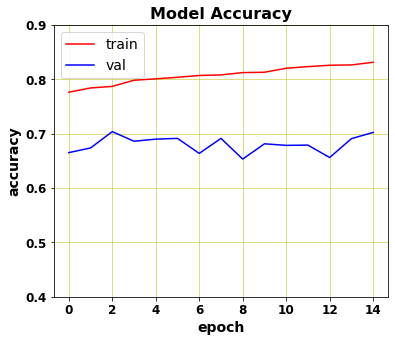

In [164]:

history = model.fit( X_train, Y_train, 
                    epochs = 15, batch_size = 100, 
                    callbacks=[save_best], verbose=1, 
                    validation_data = (X_val, Y_val))

# Plot the training history (Training accuracy & Validation accuracy)

plt.figure(figsize=(6, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy', weight='bold', fontsize=16)
plt.ylabel('accuracy', weight='bold', fontsize=14)
plt.xlabel('epoch', weight='bold', fontsize=14)
plt.ylim(0.4, 0.9)
plt.xticks(weight='bold', fontsize=12)
plt.yticks(weight='bold', fontsize=12)
plt.legend(['train', 'val'], loc='upper left', prop={'size': 14})
plt.grid(color = 'y', linewidth='0.5')
plt.show()

In [165]:
#Run model on the held-out test set

model = load_model('/content/model.hdf5')
score = model.evaluate(X_test, Y_test, verbose=0)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

Accuracy over the test set: 
  70.56 %


<Figure size 432x288 with 0 Axes>

(<matplotlib.image.AxesImage at 0x7efc1264a780>, (-0.5, 99.5, 99.5, -0.5))

Text(0.5, 1.0, 'animal')

<Figure size 432x288 with 0 Axes>

(<matplotlib.image.AxesImage at 0x7efc124b32b0>, (-0.5, 99.5, 99.5, -0.5))

Text(0.5, 1.0, 'animal')

<Figure size 432x288 with 0 Axes>

(<matplotlib.image.AxesImage at 0x7efc11b1d400>, (-0.5, 99.5, 99.5, -0.5))

Text(0.5, 1.0, 'plain')

<Figure size 432x288 with 0 Axes>

(<matplotlib.image.AxesImage at 0x7efc67a1ce10>, (-0.5, 99.5, 99.5, -0.5))

Text(0.5, 1.0, 'plain')

<Figure size 432x288 with 0 Axes>

(<matplotlib.image.AxesImage at 0x7efc1c3cc940>, (-0.5, 99.5, 99.5, -0.5))

Text(0.5, 1.0, 'stripes')

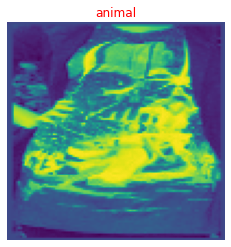

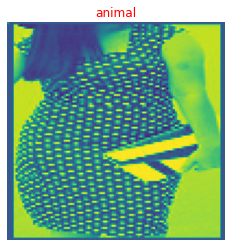

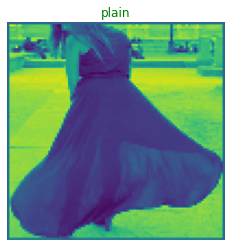

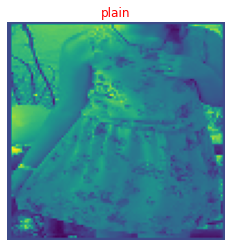

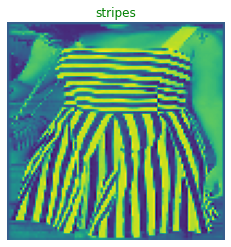

In [166]:
Y_pred = np.round(model.predict(X_test))

np.random.seed(87)
for rand_num in np.random.randint(0, len(Y_test), 5):
  plt.figure()
  plt.imshow(X_test[rand_num].reshape(100, 100)), plt.axis('off')
  if np.where(Y_pred[rand_num] == 1)[0].sum() == np.where(Y_test[rand_num] == 1)[0].sum():
    plt.title(encoder.classes_[np.where(Y_pred[rand_num] == 1)[0].sum()], color='g')
  else :
    plt.title(encoder.classes_[np.where(Y_pred[rand_num] == 1)[0].sum()], color='r')

In [167]:
def find_similar_images(image_url, no_of_images):

  """
  Takes in an image_url, and number of similar images needed.
  Model makes prediction on the dress category in the image
  The original image and desired number of similar images from the dataset are plotted
  """

  X_query = image_processing(image_url)
  X_query = X_query/255
  X_query = X_query.reshape(1, 100, 100, 1)
  Y_query = np.round(model.predict(X_query))
  i = np.where(Y_query == 1)[0].sum()
  print('Type detected by model:', encoder.classes_[i].upper())
  df_req = df.loc[ df['category'] == encoder.classes_[i]]
  df_req = df_req.reset_index(drop=True)

  if no_of_images > len(df_req):
    return(print('number of images needed are more than similar images in the dataset'))

  plt.figure()
  show_image_from_url(image_url)
  plt.title('Query Image')

  c = 1
  np.random.seed(13)
  for j in np.random.randint(0, len(df_req), no_of_images):
    plt.figure()
    url = df_req['image_url'].iloc[j]
    show_image_from_url(url)
    plt.title('Similar Image {}'.format(c))
    c += 1

Type detected by model: ANIMAL


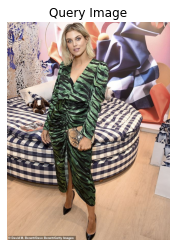

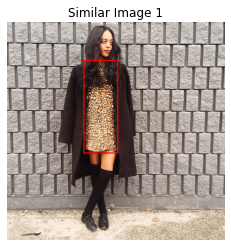

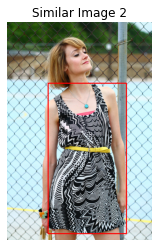

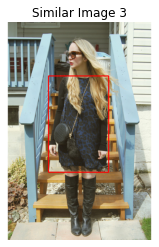

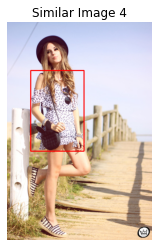

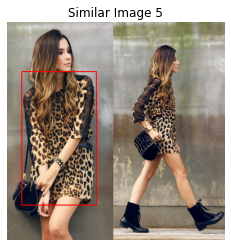

In [168]:
find_similar_images('https://i.dailymail.co.uk/1s/2018/11/06/23/5855600-6360713-Ashley_James_stuns_in_emerald_green_animal_print_dress_at_glitzy-a-123_1541546195058.jpg', 5)